Examples of doman coloring which is used for complex numbers <br>
<br> 
Modified    By    Reason <br> 
--------    ---   ------ <br>
27-Aug-23.  CBL.  Original <br> 
<hr> 
References: <br> 
https://en.wikipedia.org/wiki/Domain_coloring <br> 
https://en.wikipedia.org/wiki/HSL_and_HSV#:~:text=The%20difference%20between%20HSL%20and,red%2C%20just%20brighter%20and%20more < br> 

<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import matplotlib.colors as mcolors

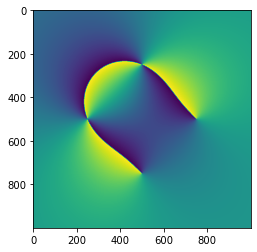

In [2]:
# Example from Reddit

def f(z): 
    return (z - 1)*(z + 1)**2 / ((z + 1j)*(z - 1j)**2)

xs,xe,rx, ys,ye,ry = -2,2,1000, -2,2,1000

x,y = np.ogrid[xs:xe:1j*rx, ys:ye:1j*ry]

plt.imshow(np.angle(f((x - 1j*y).T)))

plt.show()

In [6]:
def g(x):
    """
    reference: https://notebook.community/empet/Math/DomainColoring
    """
    return (1- 1/(1+x**2))**0.2

In [7]:
def Hcomplex(z):
    """
    computes the hue corresponding to the complex number z.
    @param z - input complex number.
    returns corresponding hue!
    
    reference: https://notebook.community/empet/Math/DomainColoring
    """ 
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)

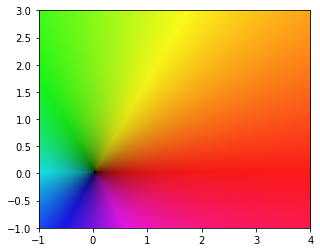

In [8]:
# HSV example
x = np.arange(-1,4, 0.05)
y = np.arange(-1,3, 0.05)
x, y = np.meshgrid(x,y)
z = x + 1j*y
H = Hcomplex(z)
V = g(np.absolute(z))
S = 0.9*np.ones(H.shape)
HSV = np.dstack((H, S, V))
RGB = hsv_to_rgb(HSV)
plt.imshow(RGB, origin="lower", extent=[-1, 4, -1, 3])

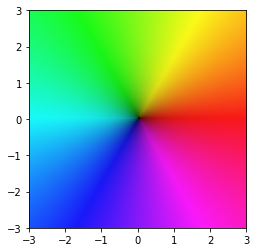

In [9]:
# change this a tiny bit. -3,3
x = np.arange(-3,3, 0.05)
y = np.arange(-3,3, 0.05)
x, y = np.meshgrid(x,y)
z = x + 1j*y
H = Hcomplex(z)
V = g(np.absolute(z))
S = 0.9*np.ones(H.shape)
HSV = np.dstack((H, S, V))
RGB = hsv_to_rgb(HSV)
plt.imshow(RGB, origin="lower", extent=[-3, 3, -3, 3])
# This starts to replicate what is in the book. The colors are more vibrant. And I don't get the black. 

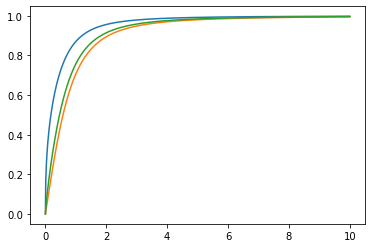

In [11]:
# Another example
x = np.linspace(0, 10, 1000)
y = g(x)
f = lambda z: (1 - 1/(1+z**2))**0.5
h = lambda z: (1.-1/(1+z**2))**0.4
plt.plot(x,y)
plt.plot(x, f(x))
plt.plot(x, h(x))
# I did not know you could inline functions like thta. 

In [12]:
#
# Domain Coloring as a method of visualization of complex functions, 
# gained popularity after the publication of the review by F. Farris for the T Needham' 
# book, Visual complex analysis.
def func_vals(f, re, im,  N): 
    """
    evaluates the complex function at the nodes of the grid
    @param re and @param im are  tuples, re=(a, b) and im=(c, d), defining the rectangular region
    @param N is the number of discrete points per unit interval 
    """
    
    l = re[1]-re[0]
    h = im[1]-im[0]
    resL = N * l # horizontal resolution
    resH = N * h # vertical resolution
    x = np.linspace(re[0], re[1], int(resL))
    y = np.linspace(im[0], im[1], int(resH))
    x, y = np.meshgrid(x,y)
    z = x + 1j*y
    return f(z)

In [13]:
def domaincol_c(w, s):#Classical domain coloring
    # w is the  array of values f(z)
    # s is the constant saturation
    
    H = Hcomplex(w)
    S = s * np.ones(H.shape)
    modul = np.absolute(w)
    V = (1.0-1.0/(1+modul**2))**0.2
    # the points mapped to infinity are colored with white; hsv_to_rgb(0, 0, 1)=(1, 1, 1)=white

    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
    return RGB

In [14]:
def plot_domain(color_func, f,   re=[-1,1], im= [-1,1], title='',
                s=0.9, N=200, daxis=None):
    w = func_vals(f, re, im, N)
    domc = color_func(w, s)
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(title)
    if(daxis):
         plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])
       
    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

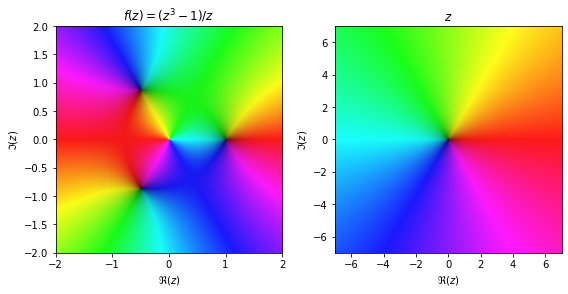

In [15]:
plt.rcParams['figure.figsize'] = 8, 5
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1, 2, 1)
f = lambda z: (z**3 - 1)/z
plot_domain(domaincol_c, f, re=ab, im= cd, title='$f(z)=(z^3-1)/z$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_c, lambda z:z, re=[-7, 7], im=[-7, 7], title='$z$', daxis=True)
plt.tight_layout()

This webpage goes on to say that this is how the Visual quantum mechanics book does things! It isn't quite 
right, but I'll go with it. Also check this out at some point: <br> 
https://pypi.org/project/cplot/
<br>